# EDF 모형이란?
<pre>

- EDF(Expected Default Frequency) 모형은 예상부도확률로 Merton(1974)의 옵션가격결정모형을 으용해 기업의 부도를 예측하는 모형.

- Moody's Analytics에서 KMV 모델의 일부로 개발한 신용 측정값. EDF는 보통 1년의 기간 내에 이자 및 원금 지급을 이행하지 않음으로써 기업이 특정 기간 내에 지급을 채무불이행할 확률을 측정.

- 옵션가격결정모형을 이용해 기업의 부도확률을 추정하는 모형이기 때문에 은행에 대해서도 동모형을 적용할 수 있다.

- EDF는 자산의 시장가치가 미지급 부채 이하로 하락할 때 회사가 채무불이행에 들어간다고 판단. EDF 모델은 1년에서 5년 사이의 기간 범위에서 신용을 측정.

- EDF모형은 주가총액, 주가변동성, 부채장부가액, 자산의 기대수익률, 만기, 파산유예기대변수 6개변수로 하고 있다.

Altman(1968)의 다변량 판별분석과 Ohlson(1980)의 로짓 모형으로 대표되는 전통적인 기업부도예측 연구는 다양한 방법론을 적용하여 예측 성과를 높이는 방향으로 발전하여 왔음. ∙ McQuown(1993)은 자본시장의 시장 가격을 바탕으로 옵션가격 평가모형을 적용하여 기업의 부도 위험 수준인 EDF
(Expected default frequency)를 측정하는 모형(KMV 모형)
을 제시
∙ 오세경(2001)은 국내 기업을 대상으로 로짓(Logit) 모형을
이용한 다변량 판별분석과 함께 옵션가격 평가모형을 이용하여 EDF의 시간별 변화 추이를 분석





<몬테카를로 시뮬레이션>
몬테카를로 시뮬레이션은 불확실한 사건의 가능한 결과를 예측하는 수학적 기법.
예측에 불확실성 또는 무작위성을 포함할 수 있는 확률적 모델.
몬테카를로 시뮬레이션은 무작위 데이터 샘플의 대규모 풀에서 여러 가지 가능한 결과와 각각의 확률을 제공한다.
예를 들어 재무 위험을 예측하려면 수십 또는 수백개의 위험 요소를 분석해야 한다. 재무 분석가는 몬테가를로 시뮬레이션을 사용하여 가능한 모든 결과의 확률을 산출할 수 있다.

-> 회사에서는 몬테카를로 방법을 사용하여 위험을 평가하고 정확한 장기 예측을 수행한다.

In [1]:
# 이거 실행하고 다시 런타임 시작
# 한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (15.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 4.9 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 254 kB 42.1 MB/s 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock
sns.set(font='NaNumBarunGothic')


import warnings
warnings.filterwarnings('ignore')
import re
pd.options.display.max_columns = None

In [5]:
fs = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/real_real_df.csv')
fs

,KIS,Stock,Name,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),총자산증가율 (2019),자기자본증가율 (2019),매출액증가율 (2019),총자본영업이익율 (2019),총자본순이익율 (2019),자본금순이익율 (2019),매출액순이익율 (2019),매출액영업이익율 (2019),자기자본비율 (2019),부채비율 (2019),유보액/납입자본비율 (2019),총자본회전율 (2019),자기자본회전율 (2019),당기순이익(손실) (2019),영업활동으로인한현금흐름 (2019),총자산증가율 (2020),자기자본증가율 (2020),매출액증가율 (2020),총자본영업이익율 (2020),총자본순이익율 (2020),자본금순이익율 (2020),매출액순이익율 (2020),매출액영업이익율 (2020),자기자본비율 (2020),부채비율 (2020),유보액/납입자본비율 (2020),총자본회전율 (2020),자기자본회전율 (2020),당기순이익(손실) (2020),영업활동으로인한현금흐름 (2020),총자산증가율 (2021),자기자본증가율 (2021),매출액증가율 (2021),총자본영업이익율 (2021),총자본순이익율 (2021),자본금순이익율 (2021),매출액순이익율 (2021),매출액영업이익율 (2021),자기자본비율 (2021),부채비율 (2021),유보액/납입자본비율 (2021),총자본회전율 (2021),자기자본회전율 (2021),당기순이익(손실) (2021),영업활동으로인한현금흐름 (2021),2018_관리종목여부,2019_관리종목여부,2020_관리종목여부,2021_관리종목여부,NaN_cnt
0,036644,389500,(주)에스비비테크,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,-21.16,-95.80,-34.70,-17.06,-21.67,-421.59,-79.56,-62.63,1.08,9183.55,-81.52,0.27,2.31,-4.789125e+09,-2.686112e+09,-23.07,747.37,9.76,-15.18,-19.01,-229.83,-49.59,-39.60,11.87,742.79,3.70,0.38,6.64,-3.276516e+09,-1.165070e+09,17.62,270.81,2.61,-13.65,-17.26,-138.70,-41.54,-32.85,37.41,167.32,181.23,0.42,1.62,-2.815924e+09,-1.715607e+09,0,0,0,0,0
1,497730,296640,(주)이노룰스,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,-1.20,32.63,43.95,17.43,3.89,210.40,4.61,20.65,54.98,81.89,2891.58,0.84,1.76,6.186920e+08,4.188603e+09,-17.63,-18.42,-20.68,8.25,11.05,519.76,14.96,11.17,54.46,83.64,3253.12,0.74,1.35,1.591312e+09,1.613872e+09,34.80,84.24,50.27,21.71,19.71,269.93,18.83,20.74,74.43,34.35,737.77,1.05,1.59,3.009484e+09,2.473444e+09,0,0,0,0,0
2,499459,417970,모델솔루션(주),23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,9.91,24.51,8.93,21.58,16.81,774.92,12.00,15.41,54.31,84.14,2521.46,1.40,2.73,7.270528e+09,1.075707e+10,-6.52,-7.50,-9.16,15.68,2.97,138.47,2.36,12.49,53.74,86.09,2324.91,1.26,2.32,1.299209e+09,8.304769e+09,14.00,18.82,9.20,18.82,15.64,391.32,11.79,14.19,56.01,78.54,907.47,1.33,2.41,7.086006e+09,9.397543e+09,0,0,0,0,0
3,HS8995,314140,(주)알피바이오,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,29.38,7.64,7.86,3.85,3.33,105.70,4.90,5.67,48.94,104.35,1624.67,0.68,1.28,3.423335e+09,6.582410e+09,12.53,7.59,40.18,3.37,3.75,140.12,4.71,4.25,46.79,113.72,1755.41,0.79,1.66,4.615509e+09,6.454520e+09,10.19,6.38,17.40,4.29,2.78,115.74,3.32,5.11,45.17,121.38,1873.56,0.84,1.83,3.812561e+09,9.459383e+09,0,0,0,0,0
4,867055,129920,(주)대성하이텍,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,2.05,9.07,-17.48,4.13,2.48,254.75,4.24,7.07,40.64,146.04,3888.07,0.58,1.49,3.099913e+09,-5.228960e+09,-6.44,-38.57,-0.67,-6.91,-9.59,-910.80,-16.15,-11.63,26.69,274.72,2349.90,0.59,1.75,-1.173379e+10,1.280408e+10,20.71,-1.84,41.38,8.96,5.71,681.58,7.26,11.38,21.70,360.80,3342.41,0.79,3.28,7.457426e+09,8.944090e+08,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,I73639,950110,SBI핀테크솔루션즈(주),146.31,77.94,10.83,8.05,7.49,24.84,16.69,17.92,45.68,118.91,93.99,0.45,0.88,3.963095e+09,2.682301e+09,0.36,3.69,-9.68,2.30,-0.17,-0.62,-0.59,8.09,47.20,111.87,100.17,0.28,0.61,-1.268170e+08,3.725843e+09,74.60,20.05,42.48,8.60,7.44,37.52,25.24,29.18,32.45,208.15,134.93,0.29,0.78,7.710943e+09,3.268879e+09,78.37,-3.08,-3.40,0.92,3.84,34.32,23.90,5.72,17.63,467.08,117.88,0.16,0.70,7.052749e+09,-8.972330e+10,0,0,0,0,0
1275,125028

In [7]:
# 재무제표 데이터에서 'NAN_cnt' 지우기
fs.drop('NaN_cnt', axis=1, inplace = True)

In [8]:
# 종목코드 6자리로 채워주기
fs['Stock'] = fs['Stock'].astype('str')
fs['Stock'] = fs['Stock'].apply(lambda x: x.zfill(6) if len(x)!=6 else x) # 종목코드 6자리로 만들어주기

stock_code = list(fs['Stock'])
stock_code

['389500',
 '296640',
 '417970',
 '314140',
 '129920',
 '368600',
 '365340',
 '403870',
 '112290',
 '402030',
 '412350',
 '377460',
 '399720',
 '389260',
 '396300',
 '366030',
 '388720',
 '288980',
 '146320',
 '371950',
 '365900',
 '370090',
 '251120',
 '137080',
 '136410',
 '377330',
 '102370',
 '353590',
 '361570',
 '290090',
 '372800',
 '311320',
 '376180',
 '348370',
 '382800',
 '377450',
 '114840',
 '382480',
 '376290',
 '159010',
 '382840',
 '257720',
 '377220',
 '099430',
 '273640',
 '099390',
 '367000',
 '357580',
 '303530',
 '376190',
 '276730',
 '361670',
 '252990',
 '352480',
 '357230',
 '294570',
 '351330',
 '059270',
 '333620',
 '289220',
 '361390',
 '314930',
 '356890',
 '247660',
 '322310',
 '262840',
 '277810',
 '163730',
 '352700',
 '348030',
 '086710',
 '357550',
 '347860',
 '356860',
 '352940',
 '352770',
 '265740',
 '129890',
 '199820',
 '299030',
 '340570',
 '290690',
 '348350',
 '347000',
 '301300',
 '348210',
 '332370',
 '950190',
 '337930',
 '060850',
 '032300',

In [9]:
fs

,KIS,Stock,Name,총자산증가율 (2018),자기자본증가율 (2018),매출액증가율 (2018),총자본영업이익율 (2018),총자본순이익율 (2018),자본금순이익율 (2018),매출액순이익율 (2018),매출액영업이익율 (2018),자기자본비율 (2018),부채비율 (2018),유보액/납입자본비율 (2018),총자본회전율 (2018),자기자본회전율 (2018),당기순이익(손실) (2018),영업활동으로인한현금흐름 (2018),총자산증가율 (2019),자기자본증가율 (2019),매출액증가율 (2019),총자본영업이익율 (2019),총자본순이익율 (2019),자본금순이익율 (2019),매출액순이익율 (2019),매출액영업이익율 (2019),자기자본비율 (2019),부채비율 (2019),유보액/납입자본비율 (2019),총자본회전율 (2019),자기자본회전율 (2019),당기순이익(손실) (2019),영업활동으로인한현금흐름 (2019),총자산증가율 (2020),자기자본증가율 (2020),매출액증가율 (2020),총자본영업이익율 (2020),총자본순이익율 (2020),자본금순이익율 (2020),매출액순이익율 (2020),매출액영업이익율 (2020),자기자본비율 (2020),부채비율 (2020),유보액/납입자본비율 (2020),총자본회전율 (2020),자기자본회전율 (2020),당기순이익(손실) (2020),영업활동으로인한현금흐름 (2020),총자산증가율 (2021),자기자본증가율 (2021),매출액증가율 (2021),총자본영업이익율 (2021),총자본순이익율 (2021),자본금순이익율 (2021),매출액순이익율 (2021),매출액영업이익율 (2021),자기자본비율 (2021),부채비율 (2021),유보액/납입자본비율 (2021),총자본회전율 (2021),자기자본회전율 (2021),당기순이익(손실) (2021),영업활동으로인한현금흐름 (2021),2018_관리종목여부,2019_관리종목여부,2020_관리종목여부,2021_관리종목여부
0,036644,389500,(주)에스비비테크,46.03,-39.46,2.26,-5.23,-9.21,-168.76,-20.80,-11.80,20.22,394.44,340.07,0.44,1.39,-1.917031e+09,6.075800e+07,-21.16,-95.80,-34.70,-17.06,-21.67,-421.59,-79.56,-62.63,1.08,9183.55,-81.52,0.27,2.31,-4.789125e+09,-2.686112e+09,-23.07,747.37,9.76,-15.18,-19.01,-229.83,-49.59,-39.60,11.87,742.79,3.70,0.38,6.64,-3.276516e+09,-1.165070e+09,17.62,270.81,2.61,-13.65,-17.26,-138.70,-41.54,-32.85,37.41,167.32,181.23,0.42,1.62,-2.815924e+09,-1.715607e+09,0,0,0,0
1,497730,296640,(주)이노룰스,81.84,215.02,-6.23,3.88,1.43,68.58,1.90,5.16,40.95,144.17,2371.70,0.75,2.16,1.770280e+08,1.148444e+09,-1.20,32.63,43.95,17.43,3.89,210.40,4.61,20.65,54.98,81.89,2891.58,0.84,1.76,6.186920e+08,4.188603e+09,-17.63,-18.42,-20.68,8.25,11.05,519.76,14.96,11.17,54.46,83.64,3253.12,0.74,1.35,1.591312e+09,1.613872e+09,34.80,84.24,50.27,21.71,19.71,269.93,18.83,20.74,74.43,34.35,737.77,1.05,1.59,3.009484e+09,2.473444e+09,0,0,0,0
2,499459,417970,모델솔루션(주),23.53,44.46,9.65,25.30,19.34,768.48,12.97,16.97,47.94,108.60,2005.45,1.49,3.33,7.210181e+09,5.469434e+09,9.91,24.51,8.93,21.58,16.81,774.92,12.00,15.41,54.31,84.14,2521.46,1.40,2.73,7.270528e+09,1.075707e+10,-6.52,-7.50,-9.16,15.68,2.97,138.47,2.36,12.49,53.74,86.09,2324.91,1.26,2.32,1.299209e+09,8.304769e+09,14.00,18.82,9.20,18.82,15.64,391.32,11.79,14.19,56.01,78.54,907.47,1.33,2.41,7.086006e+09,9.397543e+09,0,0,0,0
3,HS8995,314140,(주)알피바이오,38.75,31.69,-5.02,8.28,5.66,146.00,6.74,9.85,58.82,70.00,1558.22,0.84,1.40,4.363446e+09,6.995499e+09,29.38,7.64,7.86,3.85,3.33,105.70,4.90,5.67,48.94,104.35,1624.67,0.68,1.28,3.423335e+09,6.582410e+09,12.53,7.59,40.18,3.37,3.75,140.12,4.71,4.25,46.79,113.72,1755.41,0.79,1.66,4.615509e+09,6.454520e+09,10.19,6.38,17.40,4.29,2.78,115.74,3.32,5.11,45.17,121.38,1873.56,0.84,1.83,3.812561e+09,9.459383e+09,0,0,0,0
4,867055,129920,(주)대성하이텍,8.36,26.30,7.67,3.96,1.57,162.88,2.10,5.32,38.03,162.97,4012.35,0.74,2.10,1.865670e+09,8.755060e+08,2.05,9.07,-17.48,4.13,2.48,254.75,4.24,7.07,40.64,146.04,3888.07,0.58,1.49,3.099913e+09,-5.228960e+09,-6.44,-38.57,-0.67,-6.91,-9.59,-910.80,-16.15,-11.63,26.69,274.72,2349.90,0.59,1.75,-1.173379e+10,1.280408e+10,20.71,-1.84,41.38,8.96,5.71,681.58,7.26,11.38,21.70,360.80,3342.41,0.79,3.28,7.457426e+09,8.944090e+08,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,I73639,950110,SBI핀테크솔루션즈(주),146.31,77.94,10.83,8.05,7.49,24.84,16.69,17.92,45.68,118.91,93.99,0.45,0.88,3.963095e+09,2.682301e+09,0.36,3.69,-9.68,2.30,-0.17,-0.62,-0.59,8.09,47.20,111.87,100.17,0.28,0.61,-1.268170e+08,3.725843e+09,74.60,20.05,42.48,8.60,7.44,37.52,25.24,29.18,32.45,208.15,134.93,0.29,0.78,7.710943e+09,3.268879e+09,78.37,-3.08,-3.40,0.92,3.84,34.32,23.90,5.72,17.63,467.08,117.88,0.16,0.70,7.052749e+09,-8.972330e+10,0,0,0,0
1275,125028,046970,(주)우리로,42.14,8.8

# 알트만 Z-score 모형
Z-score 모형은 기업의 도산
1년 전의 데이터를 활용하여 운전자본/총자산, 이익잉여금/총자산, 이자 및 법인세차감전이익/
총자산, 자기자본 시장가치/부채 장부가치, 매출
액/총자산 변수들을 통해서 기업의 도산 여부를
설명
- Z = 판별점수
- x1 = (유동자산 - 유동부채) / 자산총계
- X2 = 이익잉여금 / 자산총계
- X3 = 영업이익 / [(전기 자산총계 + 당기 자산총계) * 0.5]
- X4 = 시가총액 / 부채총계
- X5 = 매출액 / [(전기 자산총계 + 당기 자산총계) * 0.5]

-> 위의 수식을 통해 구한 Z값이 1.81보다 작으면 부실기업으로 판정되고, 2.67보다 크면 건전한 기업으로 판정.
-> Z값이 1.81과 2.67 사이에 있으면 판정을 보류

1) X1은 기업의 유동성 수준을 측정하는 변수.
: 유동성이란 단기간 내에 정상적인 가격으로 현금화할 수 있는 가능성을 말한다. 유동자산은 1년 이내에 현금화될 것으로 예상되는 자산이고, 유동부채는 1년 이내에 상환해야할 부채이다. 유동자산에서 유동부채를 차감함으로써 1년 이내에 유입되는 자금이 많은지, 유출되는 자금이 많은지를 파악할 수 있다. 
: 값이 클스록 Z값은 상승.

2) X2는 기업의 지급능력을 측정하는 변수
-> 이익잉여금을 기업이 벌어들인 이익 중 주주에게 배당되지 않고 회사에 유보된 이익. 이익잉여금이 클수록 기업은 원활하게 채무 상환.

3) X3은 기업의 수익성을 측정하는 변수.



In [10]:
altman_data = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/data/altman_data.csv')
altman_data.head(10)

,Massive Download,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Report as of : 2022-10-25,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Portfolio - kosdaq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,KRW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2018/Annual,2019/Annual,2020/Annual,2021/Annual,2017/Annual,2017/Annual,2017/Annual,2017/Annual,2017/Annual,2017/Annual,2017/Annual,2018/Annual,2018/Annual,2018/Annual,2018/Annual,2018/Annual,2018/Annual,2018/Annual,2019/Annual,2019/Annual,2019/Annual,2019/Annual,2019/Annual,2019/Annual,2019/Annual,2020/Annual,2020/Annual,2020/Annual,2020/Annual,2020/Annual,2020/Annual,2020/Annual,2021/Annual,2021/Annual,2021/Annual,2021/Annual,2021/Annual,2021/Annual,2021/Annual
5,KIS,Stock,Name,평균시가총액(보통주+우선주)/0D1118,평균시가총액(보통주+우선주)/0D1118,평균시가총액(보통주+우선주)/0D1118,평균시가총액(보통주+우선주)/0D1118,유동자산(계)/012000,유동부채(계)/016000,자산총계/015000,이익잉여금/018300,영업이익(손실)/025000,부채총계/018000,매출액/021000,유동자산(계)/012000,유동부채(계)/016000,자산총계/015000,이익잉여금/018300,영업이익(손실)/025000,부채총계/018000,매출액/021000,유동자산(계)/012000,유동부채(계)/016000,자산총계/015000,이익잉여금/018300,영업이익(손실)/025000,부채총계/018000,매출액/021000,유동자산(계)/012000,유동부채(계)/016000,자산총계/015000,이익잉여금/018300,영업이익(손실)/025000,부채총계/018000,매출액/021000,유동자산(계)/012000,유동부채(계)/016000,자산총계/015000,이익잉여금/018300,영업이익(손실)/025000,부채총계/018000,매출액/021000
6,036644,389500,(주)에스비비테크,NaN,NaN,NaN,NaN,"7,090,299,000.","7,257,253,000.","16,925,578,000.","7,114,078,000.","738,657,000.","8,668,831,000.","9,014,421,000.","13,568,800,000.","8,723,921,000.","24,717,222,000.","-966,592,000.","-1,088,044,000.","19,718,189,000.","9,218,357,000.","8,293,176,000.","3,591,423,000.","19,486,814,000.","-5,755,717,000.","-3,769,930,000.","19,276,907,000.","6,019,507,000.","4,417,464,000.","7,995,986,000.","14,990,522,000.","-8,866,735,000.","-2,616,470,000.","13,211,839,000.","6,606,806,000.","7,302,344,000.","6,321,137,000.","17,631,330,000.","-11,682,659,000.","-2,227,144,000.","11,035,810,000.","6,779,379,000."
7,PM6283,441270,(주)파인엠텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,497730,296640,(주)이노룰스,NaN,NaN,NaN,NaN,"4,828,215,000.","5,665,559,000.","8,788,407,000.","528,415,000.","1,500,808,000.","6,710,795,000.","9,931,987,000.","6,745,808,000.","7,579,176,000.","15,980,953,000.","926,743,000.","480,988,000.","9,435,975,000.","9,313,410,000.","7,552,133,000.","4,520,995,000.","15,788,912,000.","1,545,436,000.","2,768,827,000.","7,108,213,000.","13,406,301,000.","7,703,371,000.","5,275,242,000.","13,005,199,000.","3,136,747,000.","1,187,901,000.","5,923,127,000.","10,634,043,000.","11,289,457,000.","3,720,986,000.","17,530,505,000.","6,069,333,000.","3,314,891,000.","4,482,222,000.","15,979,685,000."
9,499459,417970,모델솔루션(주),NaN,NaN,NaN,NaN,"8,925,932,000.","6,779,529,000.","33,358,522,000.","10,984,643,000.","5,421,588,000.","19,683,736,000.","50,702,777,000.","18,654,761,000.","8,760,334,000.","41,207,294,000.","17,063,940,000.","9,433,205,000.","21,453

In [11]:
altman_data = pd.read_csv('/content/drive/MyDrive/핀테크 파이널/data/altman_data.csv')

def make_preprocessing(df):
  col_name = ['KIS', 'Stock', 'Name']
  for i in df.columns[3:]:
    col_name.append(f"{df[i].iloc[5]} ({df[i].iloc[4].split('/')[0]})")

  df.columns = col_name
  df.drop([0,1,2,3,4,5], axis=0, inplace=True)
  df = df.reset_index(drop=True)

  # 뒤에 널값인 데이터도 같이 들어왔는데 같이 삭제
  last_index = df[df['Name']=='(주)아바텍'].index # 데이터가 들어있는 맨 마지막 인덱스. 이 이후꺼를 삭제시키면 된다.
  df = df.iloc[:list(df[df['Name']=='(주)아바텍'].index).pop()+1, :]


  # stock code 없는 기업 삭제
  del_index = list(df[df['Stock'].isnull()].index)
  df.drop(del_index, axis=0,inplace=True)
  df= df.reset_index(drop= True)

   # 인수합병된 기업들 빼기
  df['인수합병여부'] = 0
  df['인수합병여부'] = df.apply(lambda x: 1 if '인수목적' in x['Name'] else 0, axis=1)


  df = df[df['인수합병여부']==0]
  df.drop('인수합병여부', axis=1, inplace=True)
  df = df.reset_index(drop = True)

  # 문자열 float로 변경
  for i in df.columns[3:]:
    df[i] = df[i].astype('str')
    df[i] = df[i].apply(lambda x: re.sub(",","",x))
    df[i] = df[i].astype('float')

  
  return df

altman = make_preprocessing(altman_data)
altman

,KIS,Stock,Name,평균시가총액(보통주+우선주)/0D1118 (2018),평균시가총액(보통주+우선주)/0D1118 (2019),평균시가총액(보통주+우선주)/0D1118 (2020),평균시가총액(보통주+우선주)/0D1118 (2021),유동자산(계)/012000 (2017),유동부채(계)/016000 (2017),자산총계/015000 (2017),이익잉여금/018300 (2017),영업이익(손실)/025000 (2017),부채총계/018000 (2017),매출액/021000 (2017),유동자산(계)/012000 (2018),유동부채(계)/016000 (2018),자산총계/015000 (2018),이익잉여금/018300 (2018),영업이익(손실)/025000 (2018),부채총계/018000 (2018),매출액/021000 (2018),유동자산(계)/012000 (2019),유동부채(계)/016000 (2019),자산총계/015000 (2019),이익잉여금/018300 (2019),영업이익(손실)/025000 (2019),부채총계/018000 (2019),매출액/021000 (2019),유동자산(계)/012000 (2020),유동부채(계)/016000 (2020),자산총계/015000 (2020),이익잉여금/018300 (2020),영업이익(손실)/025000 (2020),부채총계/018000 (2020),매출액/021000 (2020),유동자산(계)/012000 (2021),유동부채(계)/016000 (2021),자산총계/015000 (2021),이익잉여금/018300 (2021),영업이익(손실)/025000 (2021),부채총계/018000 (2021),매출액/021000 (2021)
0,036644,389500,(주)에스비비테크,NaN,NaN,NaN,NaN,7.090299e+09,7.257253e+09,1.692558e+10,7.114078e+09,7.386570e+08,8.668831e+09,9.014421e+09,1.356880e+10,8.723921e+09,2.471722e+10,-9.665920e+08,-1.088044e+09,1.971819e+10,9.218357e+09,8.293176e+09,3.591423e+09,1.948681e+10,-5.755717e+09,-3.769930e+09,1.927691e+10,6.019507e+09,4.417464e+09,7.995986e+09,1.499052e+10,-8.866735e+09,-2.616470e+09,1.321184e+10,6.606806e+09,7.302344e+09,6.321137e+09,1.763133e+10,-1.168266e+10,-2.227144e+09,1.103581e+10,6.779379e+09
1,PM6283,441270,(주)파인엠텍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,497730,296640,(주)이노룰스,NaN,NaN,NaN,NaN,4.828215e+09,5.665559e+09,8.788407e+09,5.284150e+08,1.500808e+09,6.710795e+09,9.931987e+09,6.745808e+09,7.579176e+09,1.598095e+10,9.267430e+08,4.809880e+08,9.435975e+09,9.313410e+09,7.552133e+09,4.520995e+09,1.578891e+10,1.545436e+09,2.768827e+09,7.108213e+09,1.340630e+10,7.703371e+09,5.275242e+09,1.300520e+10,3.136747e+09,1.187901e+09,5.923127e+09,1.063404e+10,1.128946e+10,3.720986e+09,1.753050e+10,6.069333e+09,3.314891e+09,4.482222e+09,1.597968e+10
3,499459,417970,모델솔루션(주),NaN,NaN,NaN,NaN,8.925932e+09,6.779529e+09,3.335852e+10,1.098464e+10,5.421588e+09,1.968374e+10,5.070278e+10,1.865476e+10,8.760334e+09,4.120729e+10,1.706394e+10,9.433205e+09,2.145321e+10,5.559806e+10,2.073613e+10,1.861937e+10,4.528936e+10,2.190527e+10,9.332657e+09,2.069394e+10,6.056418e+10,2.207469e+10,1.759698e+10,4.233815e+10,2.006120e+10,6.870288e+09,1.958681e+10,5.501846e+10,2.716175e+10,9.062293e+09,4.826561e+10,2.434381e+10,8.526295e+09,2.123166e+10,6.007888e+10
4,HV2035,393890,더블유씨피(주),NaN,NaN,NaN,NaN,1.413538e+10,4.385492e+09,9.287483e+10,-1.900798e+09,-9.083040e+08,5.387944e+09,NaN,7.660966e+09,6.746037e+09,1.577923e+11,-1.140166e+10,-1.092999e+10,1.056927e+10,NaN,1.528209e+11,4.331020e+10,4.307295e+11,-1.754902e+10,-5.055078e+09,2.367912e+11,3.480784e+10,1.238286e+11,1.279343e+11,5.231622e+11,-4.812881e+10,9.760562e+09,3.598037e+11,1.118752e+11,2.144150e+11,1.283054e+11,6.300173e+11,-5.814062e+10,4.085575e+10,2.242597e+11,1.854987e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,I73639,950110,SBI핀테크솔루션즈(주),1.587831e+11,2.479694e+11,2.782981e+11,1.904143e+11,1.303828e+10,6.999535e+09,3.053952e+10,3.858105e+09,3.821075e+09,1.122834e+10,2.142121e+10,1.317464e+10,2.285635e+10,7.522338e+10,5.602427e+09,4.254804e+09,4.086029e+10,2.374177e+10,1.512503e+10,2.688037e+10,7.549365e+10,1.978127e+09,1.734016e+09,3.986139e+10,2.144421e+10,5.957791e+10,5.033506e+10,1.318126e+11,5.528564e+09,8.915481e+09,8.903653e+10,3.055471e+10,1.420810e+11,1.156883e+11,2.351104e+11,8.382701e+09,1.688230e+09,1.936508e+11,2.951487e+10
1440,125028,046970,(주)우리로,6.063902e+10,6.468355e+10,4.823696e+10,5.452000e+10,1.895801e+10,1.748583e+10,5.066045e+10,-1.103422e+10,-4.860090e+09,1.884153e+10,1.661448e+10,2.964992e+10,3.636824e+10,7.200770e+10,-1.232072e+10,2.718326e+09,3.737979e+10,3.197440e+10,2.888815e+10

In [12]:
# fs 데이터에 있는 종목코드만 대상으로 진행하기
tmp = []
altman_df = pd.DataFrame()
for i in altman['Stock'].unique():
  if i in fs['Stock'].unique():
    idx = list(altman[altman['Stock']==i].index.values).pop()
    tmp.append(idx)
altman_df = pd.DataFrame(altman, index = tmp).reset_index(drop=True)



In [13]:
altman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   KIS                            1279 non-null   object 
 1   Stock                          1279 non-null   object 
 2   Name                           1279 non-null   object 
 3   평균시가총액(보통주+우선주)/0D1118 (2018)  1117 non-null   float64
 4   평균시가총액(보통주+우선주)/0D1118 (2019)  1167 non-null   float64
 5   평균시가총액(보통주+우선주)/0D1118 (2020)  1207 non-null   float64
 6   평균시가총액(보통주+우선주)/0D1118 (2021)  1251 non-null   float64
 7   유동자산(계)/012000 (2017)          1279 non-null   float64
 8   유동부채(계)/016000 (2017)          1279 non-null   float64
 9   자산총계/015000 (2017)             1279 non-null   float64
 10  이익잉여금/018300 (2017)            1279 non-null   float64
 11  영업이익(손실)/025000 (2017)         1279 non-null   float64
 12  부채총계/018000 (2017)             1279 non-null   f

In [14]:
def altman_z_score(df):
  year = ['2018', '2019', '2020', '2021']
  for y in year:
    
    for col in df.columns:
      if y in col:
        if '유동자산' in col:
          유동자산 = col
        if '유동부채' in col:
          유동부채 = col
        if '자산총계' in col:
          자산총계 = col
        if '이익잉여금' in col:
          이익잉여금 = col
        if '영업이익' in col:
          영업이익 = col
        if '시가총액' in col:
          시가총액 = col
        if '부채총계' in col:
          부채총계 = col
        if '매출액' in col:
          매출액 = col
      elif str(int(y)-1) in col:
        if '자산총계' in col:
          전기자산총계 = col
        

      
        

    df[f'{y}_X1'] = (df[f'{유동자산}'] - df[f'{유동부채}']) / df[f'{자산총계}']
    df[f'{y}_X2'] = df[f'{이익잉여금}'] / df[f'{자산총계}']
    df[f'{y}_X3'] = df[f'{영업이익}'] / ((df[f'{전기자산총계}'] + df[f'{자산총계}'])*0.5)
    df[f'{y}_X4'] = df[f'{시가총액}'] / df[f'{부채총계}']
    df[f'{y}_X5'] = df[f'{매출액}']/((df[f'{전기자산총계}']+df[f'{자산총계}'])*0.5)

    df[f'{y}_Z'] = 1.2*df[f'{y}_X1'] + 1.4 * df[f'{y}_X2'] + 3.3* df[f'{y}_X3'] + 0.6 * df[f'{y}_X4'] + 1.0*df[f'{y}_X5']

  return df




altman_df2 = altman_z_score(altman_df)

In [15]:
altman_df2

,KIS,Stock,Name,평균시가총액(보통주+우선주)/0D1118 (2018),평균시가총액(보통주+우선주)/0D1118 (2019),평균시가총액(보통주+우선주)/0D1118 (2020),평균시가총액(보통주+우선주)/0D1118 (2021),유동자산(계)/012000 (2017),유동부채(계)/016000 (2017),자산총계/015000 (2017),이익잉여금/018300 (2017),영업이익(손실)/025000 (2017),부채총계/018000 (2017),매출액/021000 (2017),유동자산(계)/012000 (2018),유동부채(계)/016000 (2018),자산총계/015000 (2018),이익잉여금/018300 (2018),영업이익(손실)/025000 (2018),부채총계/018000 (2018),매출액/021000 (2018),유동자산(계)/012000 (2019),유동부채(계)/016000 (2019),자산총계/015000 (2019),이익잉여금/018300 (2019),영업이익(손실)/025000 (2019),부채총계/018000 (2019),매출액/021000 (2019),유동자산(계)/012000 (2020),유동부채(계)/016000 (2020),자산총계/015000 (2020),이익잉여금/018300 (2020),영업이익(손실)/025000 (2020),부채총계/018000 (2020),매출액/021000 (2020),유동자산(계)/012000 (2021),유동부채(계)/016000 (2021),자산총계/015000 (2021),이익잉여금/018300 (2021),영업이익(손실)/025000 (2021),부채총계/018000 (2021),매출액/021000 (2021),2018_X1,2018_X2,2018_X3,2018_X4,2018_X5,2018_Z,2019_X1,2019_X2,2019_X3,2019_X4,2019_X5,2019_Z,2020_X1,2020_X2,2020_X3,2020_X4,2020_X5,2020_Z,2021_X1,2021_X2,2021_X3,2021_X4,2021_X5,2021_Z
0,036644,389500,(주)에스비비테크,NaN,NaN,NaN,NaN,7.090299e+09,7.257253e+09,1.692558e+10,7.114078e+09,7.386570e+08,8.668831e+09,9.014421e+09,1.356880e+10,8.723921e+09,2.471722e+10,-9.665920e+08,-1.088044e+09,1.971819e+10,9.218357e+09,8.293176e+09,3.591423e+09,1.948681e+10,-5.755717e+09,-3.769930e+09,1.927691e+10,6.019507e+09,4.417464e+09,7.995986e+09,1.499052e+10,-8.866735e+09,-2.616470e+09,1.321184e+10,6.606806e+09,7.302344e+09,6.321137e+09,1.763133e+10,-1.168266e+10,-2.227144e+09,1.103581e+10,6.779379e+09,0.196012,-0.039106,-0.052256,NaN,0.442735,NaN,0.241279,-0.295365,-0.170569,NaN,0.272351,NaN,-0.238719,-0.591489,-0.151779,NaN,0.383255,NaN,0.055651,-0.662608,-0.136543,NaN,0.415634,NaN
1,497730,296640,(주)이노룰스,NaN,NaN,NaN,NaN,4.828215e+09,5.665559e+09,8.788407e+09,5.284150e+08,1.500808e+09,6.710795e+09,9.931987e+09,6.745808e+09,7.579176e+09,1.598095e+10,9.267430e+08,4.809880e+08,9.435975e+09,9.313410e+09,7.552133e+09,4.520995e+09,1.578891e+10,1.545436e+09,2.768827e+09,7.108213e+09,1.340630e+10,7.703371e+09,5.275242e+09,1.300520e+10,3.136747e+09,1.187901e+09,5.923127e+09,1.063404e+10,1.128946e+10,3.720986e+09,1.753050e+10,6.069333e+09,3.314891e+09,4.482222e+09,1.597968e+10,-0.052148,0.057990,0.038837,NaN,0.752011,NaN,0.191979,0.097881,0.174305,NaN,0.843963,NaN,0.186704,0.241192,0.082510,NaN,0.738626,NaN,0.431731,0.346216,0.217116,NaN,1.046623,NaN
2,499459,417970,모델솔루션(주),NaN,NaN,NaN,NaN,8.925932e+09,6.779529e+09,3.335852e+10,1.098464e+10,5.421588e+09,1.968374e+10,5.070278e+10,1.865476e+10,8.760334e+09,4.120729e+10,1.706394e+10,9.433205e+09,2.145321e+10,5.559806e+10,2.073613e+10,1.861937e+10,4.528936e+10,2.190527e+10,9.332657e+09,2.069394e+10,6.056418e+10,2.207469e+10,1.759698e+10,4.233815e+10,2.006120e+10,6.870288e+09,1.958681e+10,5.501846e+10,2.716175e+10,9.062293e+09,4.826561e+10,2.434381e+10,8.526295e+09,2.123166e+10,6.007888e+10,0.240113,0.414100,0.253017,NaN,1.491248,NaN,0.046739,0.483674,0.215792,NaN,1.400382,NaN,0.105761,0.473833,0.156807,NaN,1.255735,NaN,0.374997,0.504372,0.188211,NaN,1.326190,NaN
3,HS8995,314140,(주)알피바이오,NaN,NaN,NaN,NaN,3.334482e+10,1.454381e+10,6.457702e+10,7.451501e+09,6.750606e+09,2.455539e+10,6.818612e+10,4.295203e+10,3.000506e+10,8.959963e+10,1.181495e+10,6.382369e+09,3.689531e+10,6.476281e+10,3.311131e+10,3.332302e+10,1.159244e+11,1.523828e+10,3.959920e+09,5.919584e+10,6.985516e+10,4.319151e+10,6.830001e+10,1.304471e+11,2.028269e+10,4.157063e+09,6.941174e+10,9.792265e+10,5.227193e+10,7.545094e+10,1.437370e+11,2.415975e+10,5.879847e+09,7.881001e+10,1.149640e+11,0.144498,0.131864,0.082793,NaN,0.840112,NaN,-0.001826,0.131450,0.038535,NaN,0.679776,NaN,-0.192480,0.155486,0.033746,NaN,0.794919,NaN,-0.161260,0.168083,0.042890,NaN,0.838590,NaN
4,867055,129920,(주)대성하이텍,NaN,NaN,NaN,NaN,7.778543e+10,4.514462e+10,1.143085e+11,1.104422e+10,6.727917e+09,7.701378e+10,8.232100e+10,7.966123e+10,4.880179e+10,1.238696e+11,1.092001e+10,4.717809e+09,7.676503e+10,8.863754e+10,8.274118e+10,4.780276e+10,1.2

In [16]:
print(altman_df2['2018_Z'].isna().sum())
print(altman_df2['2019_Z'].isna().sum())
print(altman_df2['2020_Z'].isna().sum())
print(altman_df2['2021_Z'].isna().sum())

162
112
73
29


In [17]:
# 부실기업판별여부 나누기
# Z >= 3.0 : Safe Zone, 부도 가능성 낮음, 안전 단계 기업
# 2.7 < Z <3.0 -> 건전 단계 기업
# 1.8 < Z < 2.7 : Grey Zone, 판단보류 -> 예의주시단계 기업
# Z<= 1.8 : Distress Zone, 부도 가능성 높음 -> 경계 태세 단계 기업

def label_altman(x):
  if x>=3.0: return '안전 단계 기업'
  elif x>2.7: return '건전 단계 기업'
  elif x>1.8: return '예의주시 단계 기업'
  elif x<=1.8: return '경계태세 단계 기업'
  else: return x


altman_df2['2018_부실기업판별'] = altman_df2['2018_Z'].apply(label_altman)
altman_df2['2019_부실기업판별'] = altman_df2['2019_Z'].apply(label_altman)
altman_df2['2020_부실기업판별'] = altman_df2['2020_Z'].apply(label_altman)
altman_df2['2021_부실기업판별'] = altman_df2['2021_Z'].apply(label_altman)


In [18]:
print(altman_df2['2018_부실기업판별'].value_counts())
print(altman_df2['2019_부실기업판별'].value_counts())
print(altman_df2['2020_부실기업판별'].value_counts())
print(altman_df2['2021_부실기업판별'].value_counts())

안전 단계 기업      690
예의주시 단계 기업    192
경계태세 단계 기업    181
건전 단계 기업       54
Name: 2018_부실기업판별, dtype: int64
안전 단계 기업      655
경계태세 단계 기업    238
예의주시 단계 기업    213
건전 단계 기업       61
Name: 2019_부실기업판별, dtype: int64
안전 단계 기업      723
경계태세 단계 기업    242
예의주시 단계 기업    182
건전 단계 기업       59
Name: 2020_부실기업판별, dtype: int64
안전 단계 기업      813
경계태세 단계 기업    192
예의주시 단계 기업    171
건전 단계 기업       74
Name: 2021_부실기업판별, dtype: int64


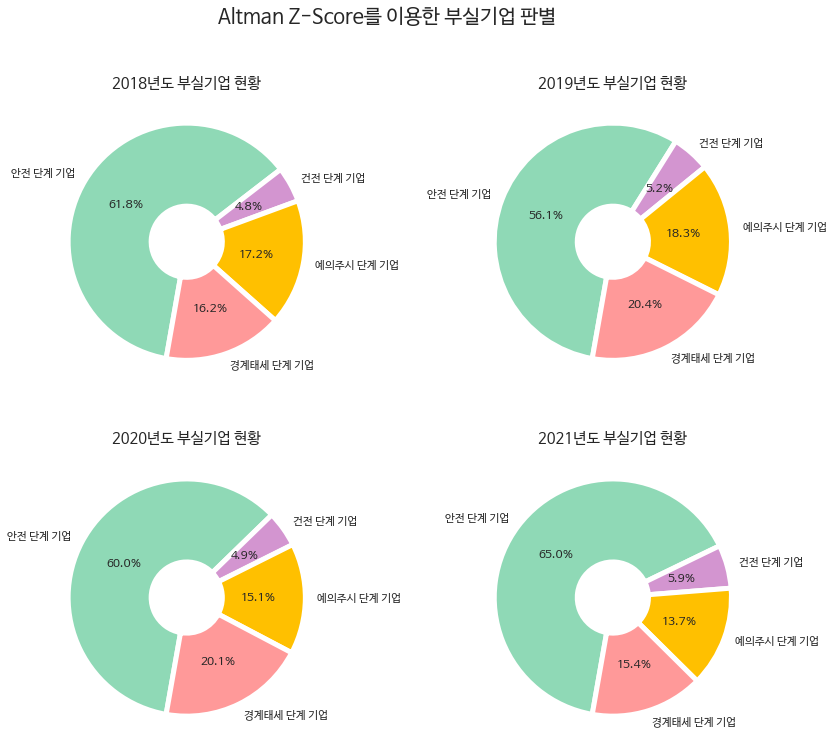

In [19]:
# 연도별 pie chart



ratio_2018 = []
ratio_2019 = []
ratio_2020 = []
ratio_2021 = []
labels = ['안전 단계 기업', '건전 단계 기업', '예의주시 단계 기업', '경계태세 단계 기업']
explode = [0, 0, 0, 0.1]
colors = ['#8fd9b6', '#d395d0','#ffc000', '#ff9999']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
for i in labels:
  tmp_2018 = len(altman_df2[altman_df2['2018_부실기업판별']==i])/altman_df2['2018_부실기업판별'].value_counts().sum() * 100
  ratio_2018.append(tmp_2018)
  
  tmp_2019 = len(altman_df2[altman_df2['2019_부실기업판별']==i])/altman_df2['2019_부실기업판별'].value_counts().sum() * 100
  ratio_2019.append(tmp_2019)

  tmp_2020 = len(altman_df2[altman_df2['2020_부실기업판별']==i])/altman_df2['2020_부실기업판별'].value_counts().sum() * 100
  ratio_2020.append(tmp_2020)

  tmp_2021 = len(altman_df2[altman_df2['2021_부실기업판별']==i])/altman_df2['2021_부실기업판별'].value_counts().sum() * 100
  ratio_2021.append(tmp_2021)



fig, axes = plt.subplots(2,2, figsize=(14,12))

axes[0][0].pie(ratio_2018, labels = labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops) 
axes[0][0].set_title('2018년도 부실기업 현황', fontsize=15)

axes[0][1].pie(ratio_2019, labels = labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops) 
axes[0][1].set_title('2019년도 부실기업 현황', fontsize=15)

axes[1][0].pie(ratio_2020, labels = labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops) 
axes[1][0].set_title('2020년도 부실기업 현황', fontsize=15)

axes[1][1].pie(ratio_2021, labels = labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops) 
axes[1][1].set_title('2021년도 부실기업 현황', fontsize=15)

plt.suptitle('Altman Z-Score를 이용한 부실기업 판별', fontsize=20)
plt.show()
                    
# altman_df2['2018_부실기업판별'].value_counts().sum()
# altman_df2['2018_부실기업판별'].value_counts().sum()

In [20]:
final_altman = altman_df2[['Stock', 'Name', '2018_Z', '2019_Z', '2020_Z', '2021_Z', '2018_부실기업판별', '2019_부실기업판별', '2020_부실기업판별', '2021_부실기업판별']]
final_altman.to_csv('altman.csv', index=False)

In [ ]:
altman_df2.to_csv('concat.csv', index=False)

In [ ]:
# def kmv(enterprise_value, short_term_debt, long_term_debt, mu, sigma, period=1):
#     """
#     KMV Model - https://www.math.ust.hk/~maykwok/Web_ppt/KMV/KMV.pdf
#     :param enterprise_value: Enterprise Value of the Firm (can market capitalisation)
#     :param short_term_debt: Firm's short term debt
#     :param long_term_debt: Firm's long term debt
#     :param mu: Expected Return after 1 year
#     :param sigma: Expected Annualized Volatility
#     :param period: period in years
#     :return: EDF (Expected Default Frequency or Probability of Default)
#     """

#     # EV(기업가치) = 시가총액 + 총 부채 (- 현금 및 현금성 자산)
#     # 기업 단기부채
#     # 기업 장기부채
#     # mu : 어떤 기대수익률일까? -> 월간 자산평균기대수익률 : 시가총액의 
#     # sigma : 어떤 변동률일까 : 전년도 대비 
    

    

#     # Calculate default point
#     default_point = short_term_debt + (0.5 * long_term_debt)

#     # Numerator
#     numer = math.log(enterprise_value / default_point) + (mu - math.pow(sigma, 2) / 2) * period

#     # Denominator
#     denom = sigma * period

#     # Distance to Default
#     distance_to_default = numer / denom
#     edf = norm.cdf(-distance_to_default)

#     return edf

# 시각화 할만한 것 
- https://namu.wiki/w/%EA%B4%80%EB%A6%AC%EC%A2%85%EB%AA%A9

# KS 통계량
- 신용평가모형에 대한 성능 측정 지표
- https://data-newbie.tistory.com/874